In [2]:
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/948.2 kB 558.9 kB/s eta 0:00:01
     ------------------- ---------------- 524.3/948.2 kB 558.9 kB/s eta 0:00:01
     ------------------- ---------------- 524.3/948.2 kB 558.9 kB/s eta 0:00:01
     ----------------------------- ------ 786.4/948.2 kB 472.3 kB/s eta 0:00:01
     ---------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
%pip install pandas_ta

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218925 sha256=ea6d34e586584d25fa3e170ea3e27ce8803aa2a1252d1028e53bd0dc1c650bd5
  Stored in directory: c:\users\homepc\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import pandas as pd
import pandas_ta as ta
data = yf.download(tickers = '^GSPC', start = '2014-01-01' , end = '2024-12-31')
data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2014-01-02,1831.979980,1845.859985,1827.739990,1845.859985,3080600000
2014-01-03,1831.369995,1838.239990,1829.130005,1833.209961,2774270000
2014-01-06,1826.770020,1837.160034,1823.729980,1832.310059,3294850000
2014-01-07,1837.880005,1840.099976,1828.709961,1828.709961,3511750000
2014-01-08,1837.489990,1840.020020,1831.400024,1837.900024,3652140000
2014-01-09,1838.130005,1843.229980,1830.380005,1839.000000,3581150000
2014-01-10,1842.369995,1843.150024,1832.430054,1840.060059,3335710000
2014-01-13,1819.199951,1843.449951,1815.520020,1841.260010,3591350000


In [143]:
data.columns = data.columns.get_level_values(0)
print(data.head())

Price             Close         High          Low         Open      Volume
Date                                                                      
2014-01-02  1831.979980  1845.859985  1827.739990  1845.859985  3080600000
2014-01-03  1831.369995  1838.239990  1829.130005  1833.209961  2774270000
2014-01-06  1826.770020  1837.160034  1823.729980  1832.310059  3294850000
2014-01-07  1837.880005  1840.099976  1828.709961  1828.709961  3511750000
2014-01-08  1837.489990  1840.020020  1831.400024  1837.900024  3652140000


In [144]:
#Adding indicators
data['RSI'] = ta.rsi(data.Close, length=15)
data['EMAF'] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length=100)
data['EMAS'] = ta.ema(data.Close, length=150)

data['TargetNextClose']=data['Close'].shift(-1)

In [145]:
print(data[['Close', 'RSI', 'EMAF', 'EMAM', 'EMAS', 'TargetNextClose']].head(20))

Price             Close        RSI         EMAF  EMAM  EMAS  TargetNextClose
Date                                                                        
2014-01-02  1831.979980        NaN          NaN   NaN   NaN      1831.369995
2014-01-03  1831.369995        NaN          NaN   NaN   NaN      1826.770020
2014-01-06  1826.770020        NaN          NaN   NaN   NaN      1837.880005
2014-01-07  1837.880005        NaN          NaN   NaN   NaN      1837.489990
2014-01-08  1837.489990        NaN          NaN   NaN   NaN      1838.130005
2014-01-09  1838.130005        NaN          NaN   NaN   NaN      1842.369995
2014-01-10  1842.369995        NaN          NaN   NaN   NaN      1819.199951
2014-01-13  1819.199951        NaN          NaN   NaN   NaN      1838.880005
2014-01-14  1838.880005        NaN          NaN   NaN   NaN      1848.380005
2014-01-15  1848.380005        NaN          NaN   NaN   NaN      1845.890015
2014-01-16  1845.890015        NaN          NaN   NaN   NaN      1838.699951

In [146]:
data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Date'], axis=1, inplace=True)
print(data.head(10))

Price        Close         High          Low         Open        RSI  \
0      1920.239990  1927.910034  1911.449951  1917.290039  36.710076   
1      1909.569946  1928.890015  1904.780029  1923.030029  33.925365   
2      1931.589966  1932.380005  1909.010010  1910.349976  43.416146   
3      1936.920044  1944.900024  1933.430054  1933.430054  45.448291   
4      1933.750000  1939.650024  1928.290039  1935.729980  44.431463   
5      1946.719971  1948.410034  1935.599976  1935.599976  49.394679   
6      1955.180054  1955.229980  1947.410034  1947.410034  52.367936   
7      1955.060059  1964.040039  1941.500000  1958.869995  52.321220   
8      1971.739990  1971.989990  1958.359985  1958.359985  57.912917   
9      1981.599976  1982.569946  1972.729980  1972.729980  60.822935   

Price         EMAF         EMAM         EMAS  TargetNextClose  
0      1954.161448  1917.816978  1885.089397      1909.569946  
1      1949.914638  1917.653670  1885.413643      1931.589966  
2      1948.169

In [133]:
data_set = data.iloc[:, 0:10]
pd.set_option('display.max_columns', None)

data_set.head(20)

Price,Close,High,Low,Open,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,1070.040039,1074.469971,1065.119995,1067.650024,36.749749,1088.712889,1069.703822,1052.172068,1064.390015
1,1064.390015,1074.839966,1061.729980,1072.680054,34.086349,1086.396424,1069.598598,1052.333895,1076.349976
2,1076.349976,1076.760010,1064.020020,1065.390015,43.391184,1085.439620,1069.732288,1052.651989,1079.770020
3,1079.770020,1084.239990,1078.449951,1078.449951,45.738079,1084.899658,1069.931055,1053.011168,1077.689941
4,1077.689941,1081.380005,1074.630005,1078.739990,44.534925,1084.213018,1070.084697,1053.338039,1085.219971
5,1085.219971,1086.069946,1080.170044,1080.630005,49.670042,1084.308918,1070.384405,1053.760316,1090.040039
6,1090.040039,1090.050049,1086.060059,1086.300049,52.675018,1084.854739,1070.773626,1054.240843,1090.130005
7,1090.130005,1094.979980,1082.589966,1092.349976,52.731456,1085.357146,1071.156920,1054.716196,1099.739990
8,1099.739990,1099.770020,1093.500000,1093.500000,58.408206,1086.726940,1071.722922,1055.312537,1105.050049
9,1105.050049,1105.550049,1101.000000,1101.000000,61.169071,1088.471998,1072.382865,1055.971312,1107.819946


In [147]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[2.73628544e-02 2.49147685e-02 2.96150969e-02 ... 4.99550477e-05
  0.00000000e+00 2.49528663e-02]
 [2.49528663e-02 2.50729963e-02 2.81720093e-02 ... 0.00000000e+00
  7.88399409e-05 3.00543246e-02]
 [3.00543246e-02 2.58940999e-02 2.91468508e-02 ... 6.34696363e-05
  2.33810855e-04 3.15131263e-02]
 ...
 [9.81509245e-01 9.79648179e-01 9.70644592e-01 ... 9.97839220e-01
  9.97593444e-01 9.81125396e-01]
 [9.81125396e-01 9.81833508e-01 9.76485015e-01 ... 9.99104979e-01
  9.98924170e-01 9.65441338e-01]
 [9.65441338e-01 9.72921280e-01 9.59325519e-01 ... 1.00000000e+00
  1.00000000e+00 9.50648796e-01]]


In [148]:
print(data.shape)
print(data_set_scaled.shape)

(2617, 9)
(2616, 9)


In [149]:
#multiple feature from data provided by the model
X = []
#number of candles or days used to make the prediction
backcandles = 30

X = np.array([data_set_scaled[i-backcandles:i, :8].copy() for i in range(backcandles, len(data_set_scaled))])

X, yi = np.array(X), np.array(data_set_scaled[backcandles:,-1])
y = np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)




[[[2.73628544e-02 2.49147685e-02 2.96150969e-02 ... 2.00901553e-02
   4.99550477e-05 0.00000000e+00]
  [2.49528663e-02 2.50729963e-02 2.81720093e-02 ... 1.90675757e-02
   0.00000000e+00 7.88399409e-05]
  [3.00543246e-02 2.58940999e-02 2.91468508e-02 ... 1.86452041e-02
   6.34696363e-05 2.33810855e-04]
  ...
  [4.26203675e-02 3.91340748e-02 4.58465712e-02 ... 2.90182406e-02
   7.21061722e-03 7.82346042e-03]
  [4.61435791e-02 4.25937872e-02 4.57529324e-02 ... 2.92340054e-02
   7.48590743e-03 8.11925292e-03]
  [4.67535609e-02 4.46806609e-02 4.90903095e-02 ... 2.94893432e-02
   7.76919027e-03 8.42035549e-03]]

 [[2.49528663e-02 2.50729963e-02 2.81720093e-02 ... 1.90675757e-02
   0.00000000e+00 7.88399409e-05]
  [3.00543246e-02 2.58940999e-02 2.91468508e-02 ... 1.86452041e-02
   6.34696363e-05 2.33810855e-04]
  [3.15131263e-02 2.90929009e-02 3.52894953e-02 ... 1.84068434e-02
   1.57834248e-04 4.08798026e-04]
  ...
  [4.61435791e-02 4.25937872e-02 4.57529324e-02 ... 2.92340054e-02
   7.48590

In [150]:
print(y)
print(y.shape)

[[0.04843839]
 [0.04414311]
 [0.04132365]
 ...
 [0.9811254 ]
 [0.96544134]
 [0.9506488 ]]
(2586, 1)


In [151]:
#split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)

X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2068
(2068, 30, 8)
(518, 30, 8)
(2068, 1)
(518, 1)
[[0.04843839]
 [0.04414311]
 [0.04132365]
 ...
 [0.52455613]
 [0.50630854]
 [0.49262078]]


In [117]:
%pip install keras
%pip install tensorflow
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 342.2 kB/s eta 0:00:03
   ---------------- ----------------------- 0.5/1.3 MB 342.2 kB/s eta 0:00:03
   ---------------- ----------------------- 0.5/1.3 MB 342.2 kB/s eta 0:00:03
   ------------------------ --------------- 0.8/1.3 MB 376.9 kB/s eta 0:00:02
   ------------------------ --------------- 0.8/1.3 MB 376

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [152]:
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

import tensorflow as tf

import numpy as np

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0116 - val_loss: 0.0011
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.0663e-04 - val_loss: 0.0013
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.8769e-04 - val_loss: 7.1915e-04
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.9731e-04 - val_loss: 0.0013
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.8807e-04 - val_loss: 0.0014
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.3972e-04 - val_loss: 7.3151e-04
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4458e-04 - val_loss: 8.0965e-04
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.4051e-04 - val_loss: 0.0020
Epoch 9/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.3018e-04 - val_loss: 6.2529e-04
Epoch 10/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5124e-04 - val_loss: 0.0014
Epoch 11/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.8137e-04 - va

In [153]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[0.5124344] [0.49083358]
[0.50010854] [0.4980635]
[0.49594966] [0.4911108]
[0.5003634] [0.50449572]
[0.49713126] [0.51148258]
[0.5045209] [0.5060484]
[0.513977] [0.48247754]
[0.51122296] [0.47231294]
[0.49268126] [0.46350483]
[0.47975546] [0.46482706]


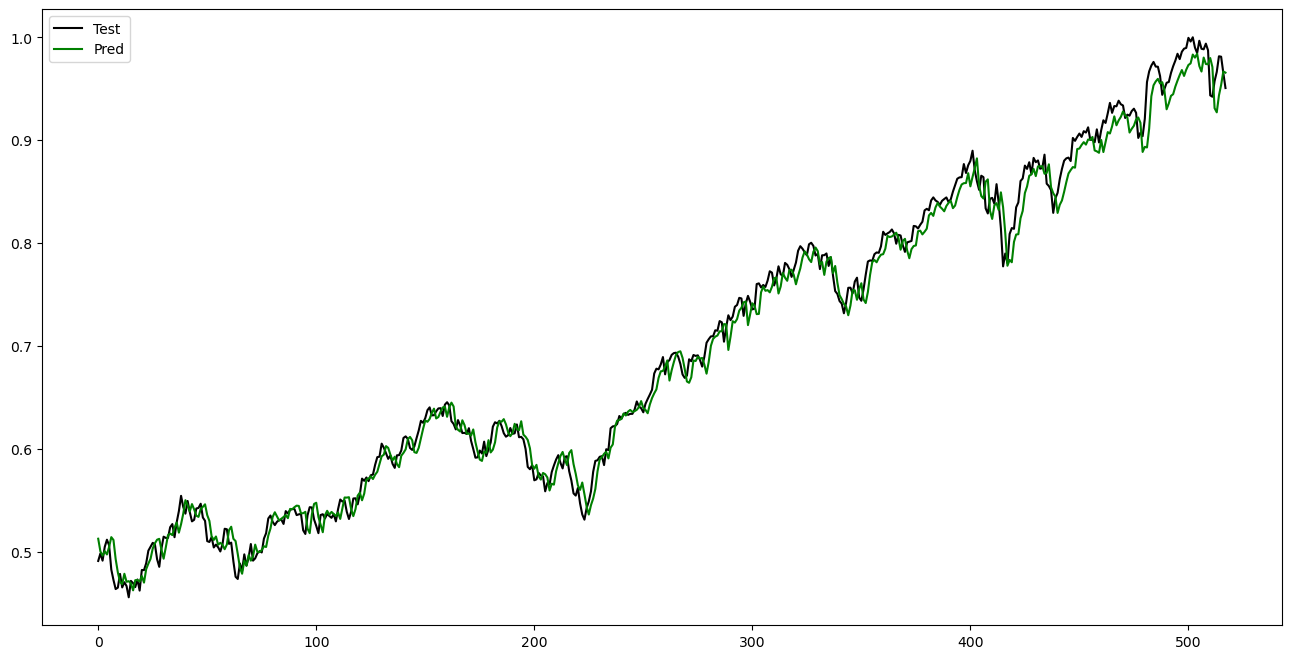

In [154]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color='black', label ='Test')
plt.plot(y_pred, color='green', label = 'Pred')
plt.legend()
plt.show()